Question. A1

In [2]:
import pandas as pd
import numpy as np

file_path = "DCT_withoutduplicate 6 1.csv"
df = pd.read_csv(file_path)
class1, class2 = 3333, 3334

features = df.columns[:-1]
class1_data = df[df["LABEL"] == class1][features].values
class2_data = df[df["LABEL"] == class2][features].values

centroid_c1 = np.mean(class1_data, axis=0)
centroid_c2 = np.mean(class2_data, axis=0)
sd_c1 = np.std(class1_data, axis=0)
sd_c2 = np.std(class2_data, axis=0)
euclidean_distance = np.linalg.norm(centroid_c1 - centroid_c2)

print(f"Centroid of Class {class1}:\n", centroid_c1)
print(f"Centroid of Class {class2}:\n", centroid_c2)
print(f"Standard Deviation of Class {class1}:\n", sd_c1)
print(f"Standard Deviation of Class {class2}:\n", sd_c2)
print(f"Euclidean Distance between Class {class1} and Class {class2}: {euclidean_distance}")


Centroid shape for Class 3333: (196,)
Centroid of Class 3333:
 [ 3.50219715e+04  3.09444505e+01  3.94544340e+01  2.39719324e+03
  6.73416964e+01  2.57414194e+03 -1.68619915e+01  1.29005681e+01
  6.35060136e+00 -4.22674245e+01 -6.36430047e+02 -1.55073295e+02
 -2.44923726e+03 -1.48058617e+02 -9.78473386e+02 -8.97400280e+01
 -1.11563771e+02 -7.82612478e+01 -8.33186550e+01 -8.15555163e+01
 -5.71929161e+01 -7.43676790e+01  1.40504455e+02  4.65734123e+02
  2.87455679e+02  7.39386113e+02  7.82807609e+01  6.45908939e+01
  1.39873888e+02  1.22408121e+02  1.94961260e+02  2.65894077e+02
  2.16260295e+02  1.80612947e+02  9.37405289e+01  1.34293096e+02
  5.60480719e+01 -9.59279554e+01  1.68442699e+02 -2.31665243e+02
  1.34798573e+02 -1.69452056e+02  5.87672528e+01 -1.59803253e+01
  1.28935856e+02 -7.47109901e+01 -9.21034316e+01 -2.05635229e+02
 -2.41288107e+02 -2.47929468e+02 -2.53955201e+02 -2.10615586e+02
 -1.97115266e+02 -6.53642214e+01 -1.25903545e+02 -1.36206502e+02
  8.15607262e+01 -9.8826889

Question. A2

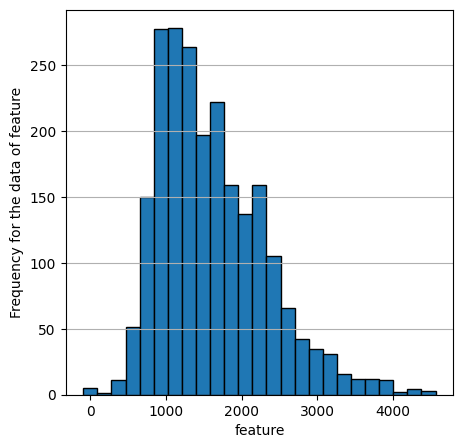

Mean for the observed feature: 1706.2681006333332
Variance for the observed feature: 499942.50785238616


In [60]:
import matplotlib.pyplot as plt
feature_name = df.columns[3]
feature_data = df[feature_name].dropna()

hist_values, bin_edges = np.histogram(feature_data, bins=25)
plt.figure(figsize=(5, 5))
plt.bar(bin_edges[:-1], hist_values, width=np.diff(bin_edges), edgecolor='black')
plt.xlabel("feature")
plt.ylabel("Frequency for the data of feature")
plt.grid(axis="y")
plt.show()

mean_value = np.mean(feature_data)
variance_value = np.var(feature_data)

print(f"Mean for the observed feature: {mean_value}")
print(f"Variance for the observed feature: {variance_value}")


Question. A3

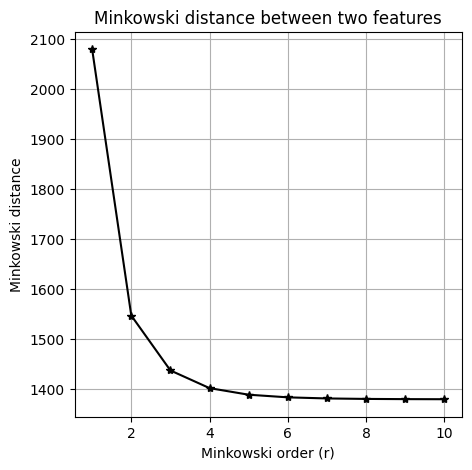

Minkowski distance (r=1): 2079.0206
Minkowski distance (r=2): 1546.5295
Minkowski distance (r=3): 1436.7244
Minkowski distance (r=4): 1401.3944
Minkowski distance (r=5): 1388.2297
Minkowski distance (r=6): 1382.9635
Minkowski distance (r=7): 1380.7648
Minkowski distance (r=8): 1379.8193
Minkowski distance (r=9): 1379.4037
Minkowski distance (r=10): 1379.2179


In [58]:
x_values = df[df.columns[3]].values
y_values = df[df.columns[5]].values

points = np.column_stack((x_values, y_values))

def minkowski_distance(x, y, r):
    return np.sum(np.abs(x - y) ** r) ** (1 / r)

point1, point2 = points[0], points[1]

distances = np.array([minkowski_distance(point1, point2, r) for r in np.arange(1, 11)])
plt.figure(figsize=(5, 5))
plt.plot(r_values, distances, marker='*', linestyle='-', color='black', label="Minkowski distance")
plt.xlabel("Minkowski order (r)")
plt.ylabel("Minkowski distance")
plt.title(f"Minkowski distance between two features")
plt.grid(True)
plt.show()

for r, d in zip(r_values, distances):
    print(f"Minkowski distance (r={r}): {d:.4f}")


Question. A4,A5,A6,A7

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
df = df[df["LABEL"].isin([3333, 3334])]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"Training Set Size: {X_train.shape[0]} samples")
print(f"Test Set Size: {X_test.shape[0]} samples")


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

knn.predict(X_test)


Training Set Size: 62 samples
Test Set Size: 27 samples
1.0


array([3333, 3334, 3333, 3333, 3334, 3333, 3333, 3333, 3333, 3334, 3333,
       3333, 3334, 3334, 3334, 3333, 3334, 3333, 3333, 3333, 3333, 3333,
       3333, 3333, 3334, 3334, 3333])

Question. A8

k = 1, Accuracy = 1.00
k = 2, Accuracy = 1.00
k = 3, Accuracy = 1.00
k = 4, Accuracy = 1.00
k = 5, Accuracy = 0.96
k = 6, Accuracy = 0.96
k = 7, Accuracy = 0.96
k = 8, Accuracy = 1.00
k = 9, Accuracy = 0.93
k = 10, Accuracy = 0.89
k = 11, Accuracy = 0.93


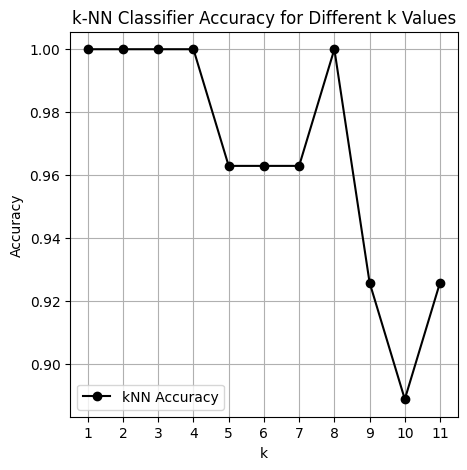

In [79]:
k_values = range(1, 12)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k = {k}, Accuracy = {acc:.2f}")

plt.figure(figsize=(5, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='black', label='kNN Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("k-NN Classifier Accuracy for Different k Values")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# accuracy score for nn when k= 1 and k=3 is same i.e, 1

Question. A9

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

train_report = classification_report(y_train, y_train_pred, target_names=[str(class1), str(class2)], output_dict=True)
test_report = classification_report(y_test, y_test_pred, target_names=[str(class1), str(class2)], output_dict=True)

train_df = pd.DataFrame(train_report).T.iloc[:-3, :-1]
test_df = pd.DataFrame(test_report).T.iloc[:-3, :-1]


print("\nConfusion Matrix for Training Data:\n", train_cm)
print("\nConfusion Matrix for Test Data:\n", test_cm)


print("\nPerformance matrix for Training Data:")
print(train_df.to_string(float_format="%.2f"))

print("\nPerformance matrix for Test Data:")
print(test_df.to_string(float_format="%.2f"))



Confusion Matrix for Training Data:
 [[30  4]
 [ 3 25]]

Confusion Matrix for Test Data:
 [[16  2]
 [ 0  9]]

Performance matrix for Training Data:
      precision  recall  f1-score
3333       0.91    0.88      0.90
3334       0.86    0.89      0.88

Performance matrix for Test Data:
      precision  recall  f1-score
3333       1.00    0.89      0.94
3334       0.82    1.00      0.90
